In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
# loading data as a DataFrame
df_survey_schema = pd.read_csv('survey_results_schema.csv')

df_answers = pd.read_csv('survey_results_public.csv',
                         usecols = ['Respondent', 'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'Age', 'Student', 'BetterLife'],
                        index_col = ['Respondent'])
pd.options.display.max_columns = None
df_answers.head()

,Hobbyist,Student,YearsCode,Age1stCode,YearsCodePro,CompFreq,ConvertedComp,WorkWeekHrs,BetterLife,Age
Respondent,,,,,,,,,,
1,Yes,No,4,10,NaN,NaN,NaN,NaN,Yes,14.0
2,No,"Yes, full-time",NaN,17,NaN,NaN,NaN,NaN,Yes,19.0
3,Yes,No,3,22,1,Monthly,8820.0,40.0,Yes,28.0
4,No,No,3,16,Less than 1 year,Yearly,61000.0,80.0,Yes,22.0
5,Yes,No,16,14,9,NaN,NaN,55.0,Yes,30.0


In [49]:
df_answers.shape

(88883, 10)

In [50]:
pd.unique(df_answers.Age1stCode)

array(['10', '17', '22', '16', '14', '15', '11', '20', '13', '18', '12',
       '19', '21', '8', '35', '6', '9', '29', '7', '5', '23', '30', nan,
       '27', '24', 'Younger than 5 years', '33', '25', '26', '39', '36',
       '38', '28', '31', 'Older than 85', '32', '37', '50', '65', '42',
       '34', '40', '67', '43', '44', '60', '46', '45', '49', '51', '41',
       '55', '83', '48', '53', '54', '47', '56', '79', '61', '68', '77',
       '66', '52', '80', '62', '84', '57', '58', '63'], dtype=object)

In [51]:
# change text value to number
df_answers.Age1stCode.replace(to_replace={'Younger than 5 years': '4',
                                          'Older than 85': '85'}, inplace=True)

In [52]:
pd.unique(df_answers.Age1stCode)

array(['10', '17', '22', '16', '14', '15', '11', '20', '13', '18', '12',
       '19', '21', '8', '35', '6', '9', '29', '7', '5', '23', '30', nan,
       '27', '24', '4', '33', '25', '26', '39', '36', '38', '28', '31',
       '85', '32', '37', '50', '65', '42', '34', '40', '67', '43', '44',
       '60', '46', '45', '49', '51', '41', '55', '83', '48', '53', '54',
       '47', '56', '79', '61', '68', '77', '66', '52', '80', '62', '84',
       '57', '58', '63'], dtype=object)

In [53]:

df_answers.YearsCode.replace(to_replace={'Less than 1 year': '1',
                                         'More than 50 years': '50'}, inplace=True)
pd.unique(df_answers.YearsCode)

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', '1', '30', '9', '26', '40', '19', '15', '20',
       '28', '25', '22', '11', '33', '50', '41', '18', '34', '24', '23',
       '42', '27', '21', '36', '32', '39', '38', '31', '37', '29', '44',
       '45', '48', '46', '43', '47', '49'], dtype=object)

In [54]:
pd.unique(df_answers.YearsCodePro)

array([nan, '1', 'Less than 1 year', '9', '3', '4', '10', '8', '2', '13',
       '18', '5', '14', '22', '23', '19', '35', '20', '25', '7', '15',
       '27', '6', '48', '12', '31', '11', '17', '16', '21', '29', '30',
       '26', '33', '28', '37', '40', '34', '24', '39', '38', '36', '32',
       '41', '45', '43', 'More than 50 years', '44', '42', '46', '49',
       '50', '47'], dtype=object)

In [55]:
df_answers.YearsCodePro.replace(to_replace={'Less than 1 year': '1',
                                            'More than 50 years': '50'}, inplace=True)

In [56]:
pd.unique(df_answers.YearsCodePro)

array([nan, '1', '9', '3', '4', '10', '8', '2', '13', '18', '5', '14',
       '22', '23', '19', '35', '20', '25', '7', '15', '27', '6', '48',
       '12', '31', '11', '17', '16', '21', '29', '30', '26', '33', '28',
       '37', '40', '34', '24', '39', '38', '36', '32', '41', '45', '43',
       '50', '44', '42', '46', '49', '47'], dtype=object)

In [57]:
pd.unique(df_answers.Age)

array([14. , 19. , 28. , 22. , 30. , 42. , 24. , 23. ,  nan, 21. , 31. ,
       20. , 26. , 29. , 38. , 47. , 34. , 32. , 25. , 17. , 35. , 27. ,
       44. , 43. , 62. , 37. , 45. , 18. , 33. , 36. , 16. , 39. , 64. ,
       41. , 54. , 49. , 40. , 56. , 12. , 58. , 46. , 59. , 51. , 48. ,
       57. , 52. , 50. , 23.9, 55. , 15. , 67. , 13. ,  1. , 53. , 69. ,
       65. , 17.5, 63. , 61. , 68. , 73. , 70. , 60. , 16.5, 46.5, 11. ,
       71. ,  3. , 97. , 29.5, 77. , 74. , 26.5, 26.3, 24.5, 78. , 72. ,
       66. , 76. , 10. , 75. , 99. , 83. , 79. , 36.8, 14.1, 13.5, 19.5,
       98. , 43.5, 22.5, 31.5, 21.5, 28.5, 33.6,  2. , 38.5, 30.8, 24.8,
       90. , 61.3, 81. ,  4. , 17.3, 19.9, 80. , 85. , 88. , 23.5, 16.9,
       20.9, 91. , 98.9, 57.9,  9. , 94. , 95. , 37.5, 14.5,  5. , 82. ,
       84. , 37.3, 33.5, 53.8, 31.4, 87. ])

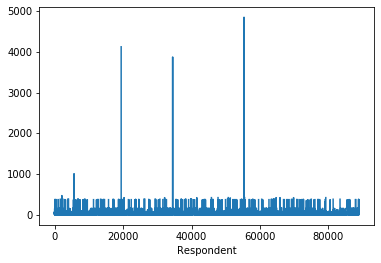

In [58]:
df_answers['WorkWeekHrs'].plot()
plt.show();

In [59]:
# removing outliers
df_answers = df_answers.loc[df_answers['WorkWeekHrs']<80]

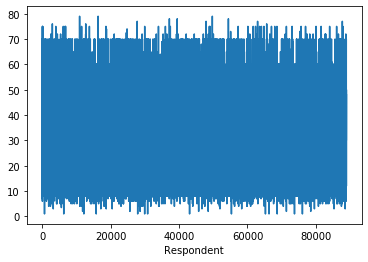

In [60]:
df_answers['WorkWeekHrs'].plot()
plt.show();

In [61]:
df_answers.loc[df_answers['CompFreq']=='Monthly', 'ConvertedComp'] = df_answers['ConvertedComp']*12

In [62]:
df_answers.loc[df_answers['CompFreq']=='Weekly', 'ConvertedComp'] = df_answers['ConvertedComp']*52

In [63]:
df_answers.drop('CompFreq', axis=1, inplace=True)

In [64]:
df_answers.head()

,Hobbyist,Student,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,BetterLife,Age
Respondent,,,,,,,,,
3,Yes,No,3,22,1,105840.0,40.0,Yes,28.0
5,Yes,No,16,14,9,NaN,55.0,Yes,30.0
6,Yes,No,13,15,3,4397040.0,15.0,No,28.0
7,No,No,6,17,4,NaN,32.0,No,42.0
9,Yes,No,12,11,4,95179.0,32.0,No,23.0


In [65]:
df_answers.dtypes

Hobbyist          object
Student           object
YearsCode         object
Age1stCode        object
YearsCodePro      object
ConvertedComp    float64
WorkWeekHrs      float64
BetterLife        object
Age              float64
dtype: object

In [66]:
# convert to float64
df_answers[['YearsCode', 'Age1stCode', 'YearsCodePro']] = df_answers[['YearsCode', 'Age1stCode', 'YearsCodePro']].astype('float64', copy=False)

In [67]:
df_answers.dtypes

Hobbyist          object
Student           object
YearsCode        float64
Age1stCode       float64
YearsCodePro     float64
ConvertedComp    float64
WorkWeekHrs      float64
BetterLife        object
Age              float64
dtype: object

In [68]:
df_answers.corr()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
YearsCode,1.000000,-0.330829,0.875327,0.010578,0.089418,0.794517
Age1stCode,-0.330829,1.000000,-0.167656,0.002751,-0.007030,-0.001328
YearsCodePro,0.875327,-0.167656,1.000000,0.010254,0.094715,0.829308
ConvertedComp,0.010578,0.002751,0.010254,1.000000,0.028727,0.021371
WorkWeekHrs,0.089418,-0.007030,0.094715,0.028727,1.000000,0.106143
Age,0.794517,-0.001328,0.829308,0.021371,0.106143,1.000000


In [69]:
df_base = df_answers[['YearsCode', 'Age1stCode', 'YearsCodePro', 'ConvertedComp', 'WorkWeekHrs', 'Age']]
df_base.dropna()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
Respondent,,,,,,
3,3.0,22.0,1.0,105840.0,40.00,28.0
6,13.0,15.0,3.0,4397040.0,15.00,28.0
9,12.0,11.0,4.0,95179.0,32.00,23.0
13,17.0,11.0,8.0,90000.0,40.00,28.0
14,13.0,16.0,2.0,684720.0,40.00,31.0
...,...,...,...,...,...,...
88877,31.0,18.0,28.0,104000000.0,45.00,48.0
88878,12.0,14.0,3.0,130000.0,40.00,26.0
88879,17.0,16.0,7.0,989856.0,37.75,34.0


In [70]:
df_base.corr()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
YearsCode,1.000000,-0.330829,0.875327,0.010578,0.089418,0.794517
Age1stCode,-0.330829,1.000000,-0.167656,0.002751,-0.007030,-0.001328
YearsCodePro,0.875327,-0.167656,1.000000,0.010254,0.094715,0.829308
ConvertedComp,0.010578,0.002751,0.010254,1.000000,0.028727,0.021371
WorkWeekHrs,0.089418,-0.007030,0.094715,0.028727,1.000000,0.106143
Age,0.794517,-0.001328,0.829308,0.021371,0.106143,1.000000


In [71]:
df_answers.Hobbyist.replace(to_replace={'Yes': '1',
                                        'No': '0'}, inplace=True)

In [72]:
pd.unique(df_answers.Student)

array(['No', 'Yes, full-time', 'Yes, part-time', nan], dtype=object)

In [73]:
df_answers.Student.replace(to_replace={'Yes, full-time': '1',
                                       'Yes, part-time': '1',
                                       'No': '0'}, inplace=True)

In [74]:
pd.unique(df_answers.BetterLife)
df_answers.BetterLife.replace(to_replace={'Yes': '1',
                                          'No': '0'}, inplace=True)

In [75]:
df_base_sd = df_base[np.abs(df_base - df_base.mean()) <= 3*df_base.std()]

df_base_sd.isna().sum()

YearsCode         989
Age1stCode        958
YearsCodePro     1295
ConvertedComp    9773
WorkWeekHrs      2647
Age              4791
dtype: int64

In [76]:
df_base_sd = df_base_sd.dropna()


In [77]:
df_base_sd.corr()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
YearsCode,1.000000,-0.417926,0.851665,0.080376,0.037288,0.774139
Age1stCode,-0.417926,1.000000,-0.252076,-0.037035,0.033286,-0.121703
YearsCodePro,0.851665,-0.252076,1.000000,0.080654,0.064264,0.812859
ConvertedComp,0.080376,-0.037035,0.080654,1.000000,0.011334,0.077326
WorkWeekHrs,0.037288,0.033286,0.064264,0.011334,1.000000,0.076252
Age,0.774139,-0.121703,0.812859,0.077326,0.076252,1.000000


In [78]:
Q1 = df_base.quantile(0.25)
Q3 = df_base.quantile(0.75)
IQR = Q3 - Q1

df_base_q = df_base[~((df_base < (Q1 - 1.5 * IQR)) | (df_base > (Q3 + 1.5 * IQR))).any(axis=1)]

In [79]:
df_base_q.corr()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
YearsCode,1.000000,-0.420842,0.821848,0.086216,-0.012600,0.728172
Age1stCode,-0.420842,1.000000,-0.242354,-0.048687,0.047766,-0.126167
YearsCodePro,0.821848,-0.242354,1.000000,0.084446,0.017324,0.779385
ConvertedComp,0.086216,-0.048687,0.084446,1.000000,-0.021400,0.066892
WorkWeekHrs,-0.012600,0.047766,0.017324,-0.021400,1.000000,0.014333
Age,0.728172,-0.126167,0.779385,0.066892,0.014333,1.000000


In [80]:
df_base_sd.describe()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
count,47850.000000,47850.000000,47850.000000,4.785000e+04,47850.000000,47850.000000
mean,12.468568,14.930930,7.605893,7.824819e+05,40.700269,30.859691
std,7.906419,4.220056,6.207062,2.516511e+06,6.285756,7.035573
min,1.000000,4.000000,1.000000,0.000000e+00,13.000000,13.000000
25%,6.000000,12.000000,3.000000,6.301600e+04,40.000000,26.000000
50%,10.000000,15.000000,6.000000,1.145970e+05,40.000000,29.000000
75%,17.000000,18.000000,10.000000,3.299040e+05,42.000000,35.000000
max,39.000000,29.000000,30.000000,3.640000e+07,67.000000,56.000000


In [81]:
df_base_q.describe()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
count,44414.000000,44360.000000,44375.000000,38040.000000,44515.000000,41918.000000
mean,11.501306,15.154103,6.903414,164292.867219,41.166293,30.097268
std,6.813939,4.075375,5.319583,166089.613285,3.675497,6.137782
min,1.000000,4.000000,1.000000,0.000000,34.000000,13.000000
25%,6.000000,12.000000,3.000000,58617.750000,40.000000,25.000000
50%,10.000000,15.000000,5.000000,96768.000000,40.000000,29.000000
75%,15.000000,18.000000,10.000000,200000.000000,42.000000,34.000000
max,33.000000,27.000000,23.000000,759744.000000,50.000000,51.000000


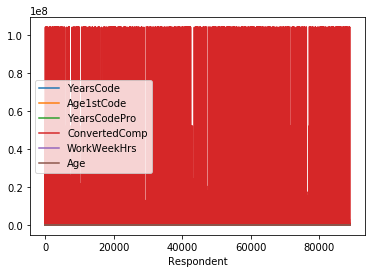

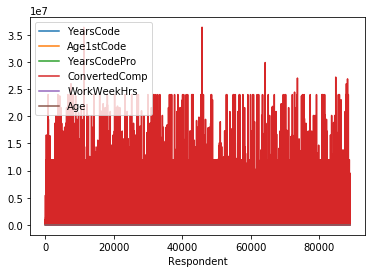

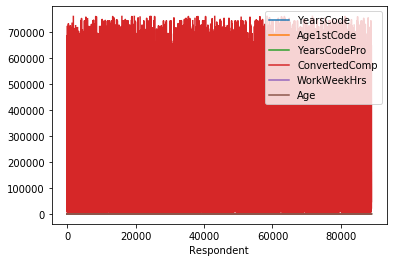

In [82]:
df_base.plot()
plt.show()
df_base_sd.plot()
plt.show()
df_base_q.plot()
plt.show()

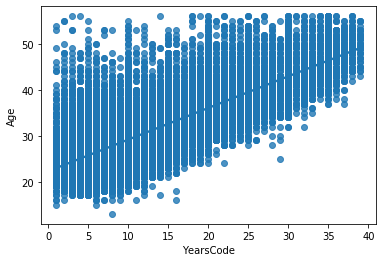

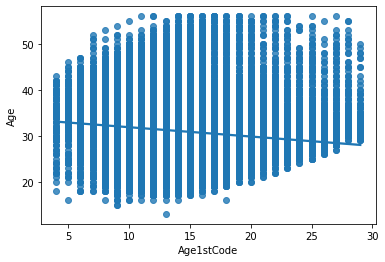

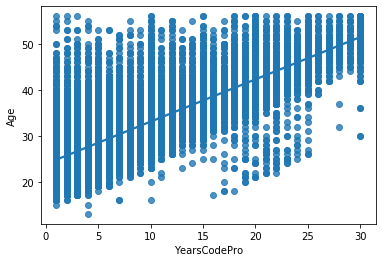

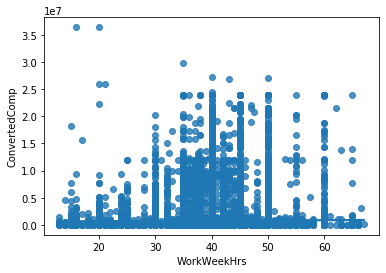

In [83]:
sns.regplot(y=df_base_sd['Age'], x=df_base_sd['YearsCode'])
plt.show();
sns.regplot(y=df_base_sd['Age'], x=df_base_sd['Age1stCode'])
plt.show();
sns.regplot(y=df_base_sd['Age'], x=df_base_sd['YearsCodePro'])
plt.show();
sns.regplot(y=df_base_sd['ConvertedComp'], x=df_base_sd['WorkWeekHrs'])
plt.show();

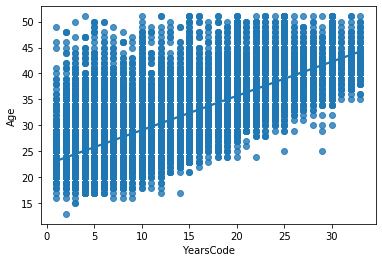

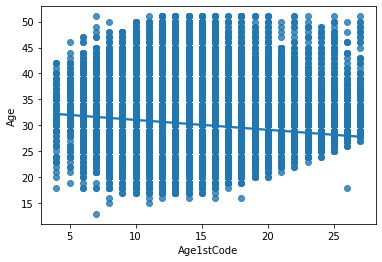

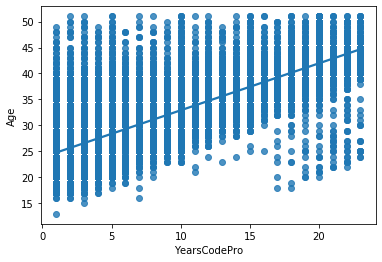

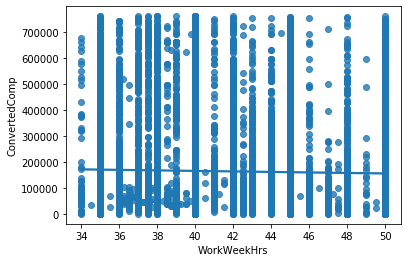

In [84]:
sns.regplot(y=df_base_q['Age'], x=df_base_q['YearsCode'])
plt.show();
sns.regplot(y=df_base_q['Age'], x=df_base_q['Age1stCode'])
plt.show();
sns.regplot(y=df_base_q['Age'], x=df_base_q['YearsCodePro'])
plt.show();
sns.regplot(y=df_base_q['ConvertedComp'], x=df_base_q['WorkWeekHrs'])
plt.show();

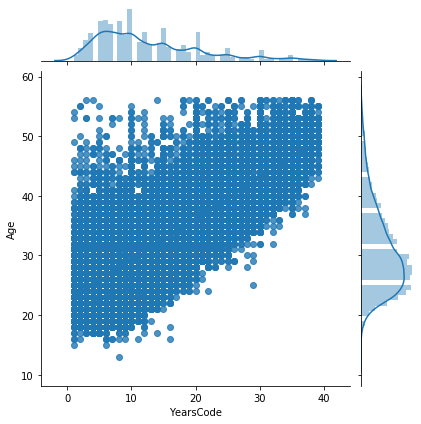

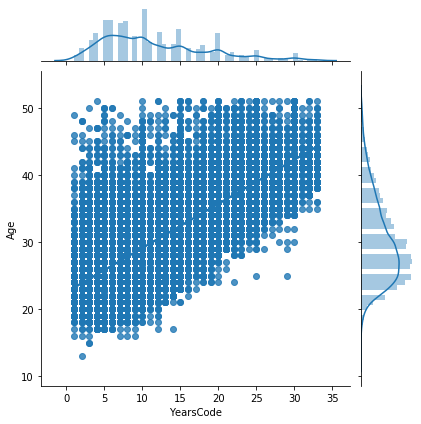

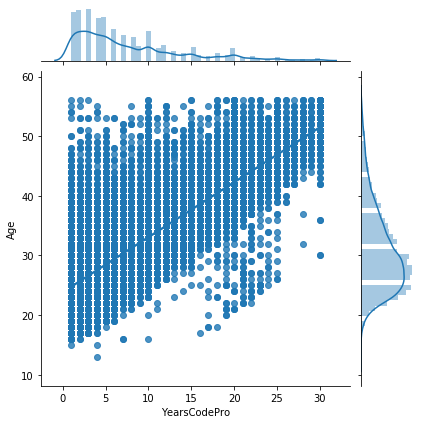

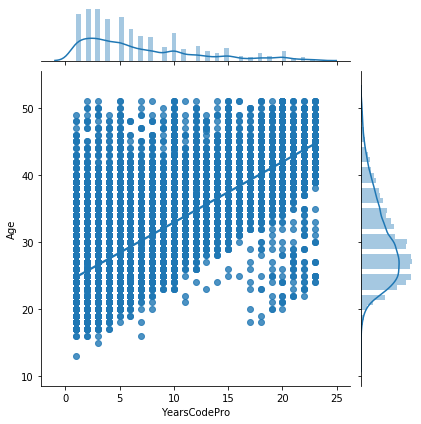

In [85]:
sns.jointplot(y='Age', x='YearsCode', data=df_base_sd, kind='reg')
plt.show();
sns.jointplot(y='Age', x='YearsCode', data=df_base_q, kind='reg')
plt.show();
sns.jointplot(y='Age', x='YearsCodePro', data=df_base_sd, kind='reg')
plt.show();
sns.jointplot(y='Age', x='YearsCodePro', data=df_base_q, kind='reg')
plt.show();

In [86]:
df_answers.dtypes

Hobbyist          object
Student           object
YearsCode        float64
Age1stCode       float64
YearsCodePro     float64
ConvertedComp    float64
WorkWeekHrs      float64
BetterLife        object
Age              float64
dtype: object

In [87]:
df_answers = df_answers.astype('float64', copy=False)

In [88]:
df_answers.dtypes

Hobbyist         float64
Student          float64
YearsCode        float64
Age1stCode       float64
YearsCodePro     float64
ConvertedComp    float64
WorkWeekHrs      float64
BetterLife       float64
Age              float64
dtype: object

In [89]:
# creating a regression model
reg_model = linear_model.LinearRegression()
reg_model.fit(df_base_sd[['YearsCodePro']], df_base_sd['Age']);

In [90]:
reg_model.predict([[1]])
reg_model.predict([[30]])

array([51.49269526])

In [91]:
df_base_sd['Age'].to_numpy()

array([28., 28., 23., ..., 34., 37., 33.])

In [92]:
mean_squared_error(df_base_sd['Age'].to_numpy(), reg_model.predict(df_base_sd[['YearsCode']]),squared=False)


6.579199825321326

In [93]:
reg_model = linear_model.LinearRegression()
reg_model.fit(df_base_sd[['YearsCode', 'YearsCodePro']], df_base_sd['Age']);

In [94]:
# mse calculation
mean_squared_error(df_base_sd['Age'].to_numpy(), reg_model.predict(df_base_sd[['YearsCode','YearsCode']]),squared=False)

5.664401386668976